# [Regressão linear no scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Nesta seção, você vai usar a regressão linear para prever a expectativa de vida a partir do índice de massa corporal (IMC). Antes de fazer isso, vamos dar uma olhada nas ferramentas necessárias para construir esse modelo.

Para seu modelo de regressão linear, você usará a classe **LinearRegression** do scikit-learn. Essa classe fornece a função **fit()** para ajustar o modelo a seus dados.

## Structure linear regression model:

1. imports
2. Load dataset
3. Analyse database
4. Choose the independent and dependent variables
5. Split the data into training/testing sets
6. Create linear regression model
7. Train the model using the training sets
8. Make predictions using the testing sets
9. Make predictions using the values that are not yet in the database.

** Antes de começar entenda o problema **

### 1. Imports

In [95]:
import pandas as pd
from sklearn.linear_model import LinearRegression

### 2. Load dataset

* Os dados estão em um arquivo chamado "bmi_and_life_expectancy.csv".
* Use o read_csv do pandas para carregar os dados em um dataframe
* Atribua o dataframe à variável bmi_life_data.

In [96]:
# Load the data in dataframe

bmi_life_data = pd.read_csv('/home/brunocampos01/projetos/data_science/'
                            'machine_learning/supervised_learning/data_base/bmi_and_life_expectancy.csv') 

### 3. Analyse data

In [97]:
bmi_life_data.head()

,Country,Life expectancy,BMI
0,Afghanistan,52.8,20.62058
1,Albania,76.8,26.44657
2,Algeria,75.5,24.59620
3,Andorra,84.6,27.63048
4,Angola,56.7,22.25083


In [98]:
# rows and columns

bmi_life_data.shape

(163, 3)

In [99]:
# name collumns

bmi_life_data.keys()

Index(['Country', 'Life expectancy', 'BMI'], dtype='object')

In [100]:
#Type dataset

type(bmi_life_data)

pandas.core.frame.DataFrame

In [101]:
#Types data in collumns

bmi_life_data.dtypes

Country             object
Life expectancy    float64
BMI                float64
dtype: object

O arquivo de dados é "bmi_and_life_expectancy.csv". Ele inclui três colunas, contendo os seguintes dados:

* **Country** – O país em que a pessoa nasceu.
* **Life expectancy** – A expectativa de vida média ao nascer para uma pessoa nesse país.
* **BMI** – O IMC médio para homens nesse país

### 4. Choosing the independent and dependent variables  

In [105]:
# escolhendo as variáveis independentes
X = bmi_life_data[["BMI"]] 

# escolhendo a variável dependente (é a variável que quero fazer a predição, target)
y = bmi_life_data['Life expectancy']

### 5. Split the data into training/testing sets

In [110]:
from sklearn.model_selection import train_test_split

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(
                                    X, 
                                    y, 
                                    test_size=0.25)

print(f"X_train:\n{X_train.head()}\n")
print(f"y_train:\n{y_train.head()}\n")
print(f"X_test:\n{X_test.head()}\n")
print(f"y_test:\n{y_test.head()}")

X_train:
          BMI
57   26.33786
146  30.99563
84   26.86102
86   26.34473
147  26.39669

y_train:
57     80.2
146    70.3
84     72.1
86     74.5
147    71.7
Name: Life expectancy, dtype: float64

X_test:
          BMI
27   23.51522
137  23.16969
149  26.70371
47   20.24700
37   26.59629

y_test:
27     70.4
137    45.1
149    77.8
47     60.0
37     76.2
Name: Life expectancy, dtype: float64


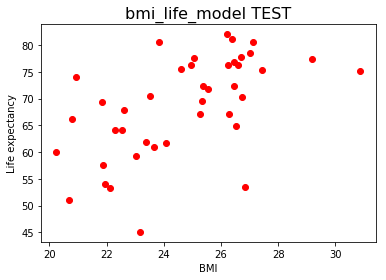

In [130]:
import matplotlib.pyplot as plt

# now we are going to plot the points
plt.scatter(X_test, y_test, color='red')
plt.title('bmi_life_model TEST', fontsize=16)
plt.xlabel("BMI")
plt.ylabel("Life expectancy")
plt.draw()

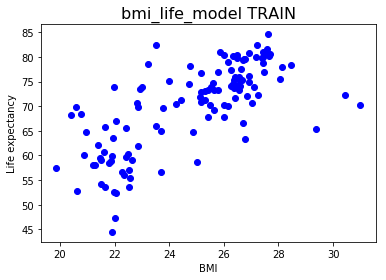

In [127]:
import matplotlib.pyplot as plt

# now we are going to plot the points and the model obtained
plt.scatter(X_train, y_train, color='blue')  # you can use test_data_X and test_data_Y instead.
plt.title('bmi_life_model TRAIN', fontsize=16)
plt.xlabel("BMI")
plt.ylabel("Life expectancy")
plt.draw()

### 6. Create linear regression model

Crie um modelo de regressão usando o método **LinearRegression()** do scikit-learn.
Ajuste o modelo aos dados com o metodo **fit(x, y)**

In [113]:
# Make a model
model = LinearRegression()

### 7. Train the model using the training sets

In [114]:
# train the model
model = model.fit(X_train, y_train)

Finalmente, com o modelo treinado, podemos realizar previsões e ver quão próximas elas estão da realidade.

Podemos fazer previsões com os **dados de teste** ou senão com algum valor do eixo X (IMC).

### 8.  Make predictions using the testing set

In [125]:
y_model = model.predict(X_test)

### 9. Make predictions using values that are not yet in the database
Faça uma previsão usando um IMC de 21.07931 e atribua o resultado à variável laos_life_exp.

In [124]:
# Make a prediction using the model
# TODO: Predict life expectancy for a BMI (IMC) value of 21.07931

laos_life_exp = model.predict(21.07931)
print(f'The Predict life expectancy to Laos is: {laos_life_exp} years.')

The Predict life expectancy to Laos is: [60.16356403] years.
